In [65]:
# Importación de librerías 
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
# Libreria para métricas
import scipy 
# Libreria para estimar regresión
import statsmodels.formula.api as sm
# Libreria para metricas 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# Libreria para separar en train y test
from sklearn.model_selection import train_test_split
# Seteo para que no se muestre notación científica
np.set_printoptions(suppress=True)

In [66]:
# Levanto el dataset
url = 'https://raw.githubusercontent.com/xlisouski/DataCoder/main/train.csv'
df = pd.read_csv(url, sep = ',')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Variable Target: SalePrice
La variable objetivo es de tipo **numérica**, por lo que el modelo a desarrollar será de tipo **Aprendizaje Supervisado: Regresión**. 
<br> <br/>
A continuación se presentarán algunas estadísticas para entender el comportamiento, formato y distribución de esta variable. 

In [67]:
# Algunas estadísticas
variable_target = df['SalePrice']
variable_target.describe().round(0)

count      1460.0
mean     180921.0
std       79443.0
min       34900.0
25%      129975.0
50%      163000.0
75%      214000.0
max      755000.0
Name: SalePrice, dtype: float64

Text(0.5, 1.0, 'Distribución de SalePrice')

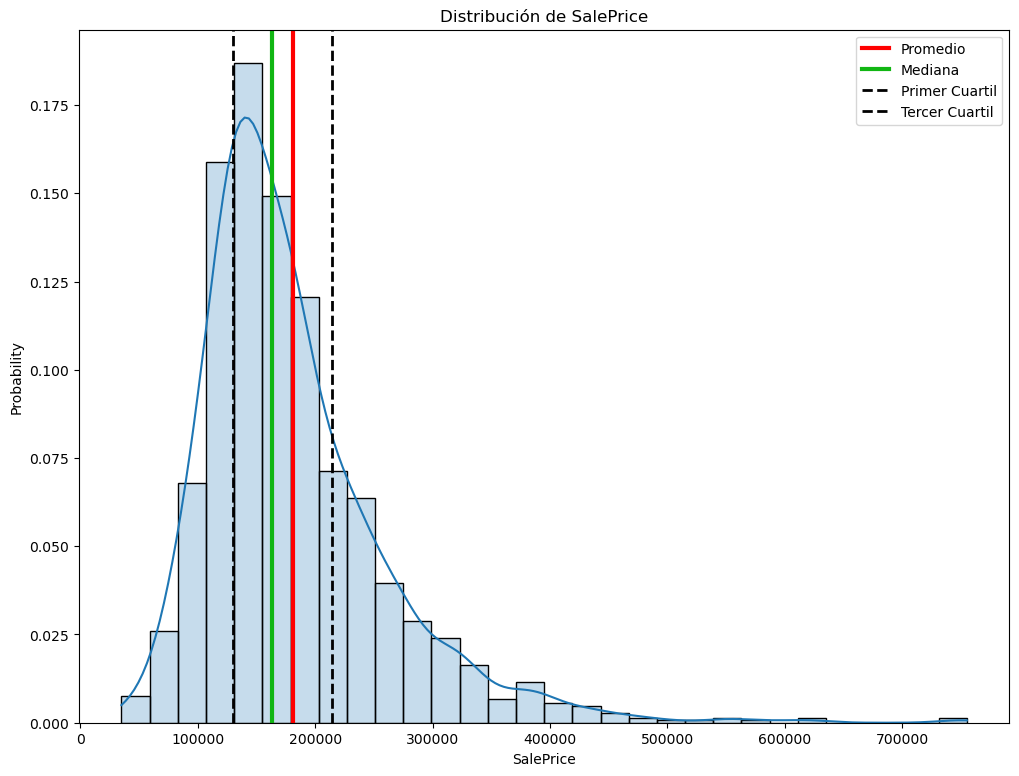

In [68]:
# Histograma variable target 
# Primero calculo algunas medidas que quiero presentar 
media = variable_target.mean()
mediana = variable_target.median()
primer_cuartil = variable_target.quantile(0.25)
tercer_cuartil = variable_target.quantile(0.75)

# Luego grafico
plt.figure()
# Histograma
sns.histplot(data = df,
             x = 'SalePrice',
             bins = 30,            
             alpha = 0.25,
             kde = True,
             stat='probability')
# Agrego linea de promedio 
plt.axvline(x = media, 
            color = 'red', 
            linestyle = '-', 
            label = 'Promedio',
            linewidth = 3)
# Agrego linea de mediana 
plt.axvline(x = mediana, 
            color = '#11B613', 
            linestyle = '-', 
            label = 'Mediana',
            linewidth = 3)
# Agrego linea de primer cuartil 
plt.axvline(x = primer_cuartil, 
            color = 'black', 
            linestyle = '--', 
            label = 'Primer Cuartil',
            linewidth = 2)
# Agrego linea de tercer cuartil 
plt.axvline(x = tercer_cuartil, 
            color = 'black', 
            linestyle = '--', 
            label = 'Tercer Cuartil',
            linewidth = 2)

plt.legend()

plt.title('Distribución de SalePrice')

## Análisis Variable Target: SalePrice
Se puede observar que la variable tiene una distribución asimétrica positiva (la mediana es menor que el promedio), concentrando gran porción de los registros en valores bajos, y observando muy pocos registros en valores altos.  
<br> <br/>
Esto indicaría que hay muy pocas casas con precios extremadamente altos. 
<br> <br/>
Al tratar con una variable target de este tipo de distribución, una buena prácica suele ser intentar predecir el logaritmo de la variable, para suavizar un poco la curva de valores posibles. 
<br> <br/>
A continuación se presentará el histograma del logaritmo de la variable target. 

Text(0.5, 1.0, 'Distribución de SalePrice transformado a Logaritmo')

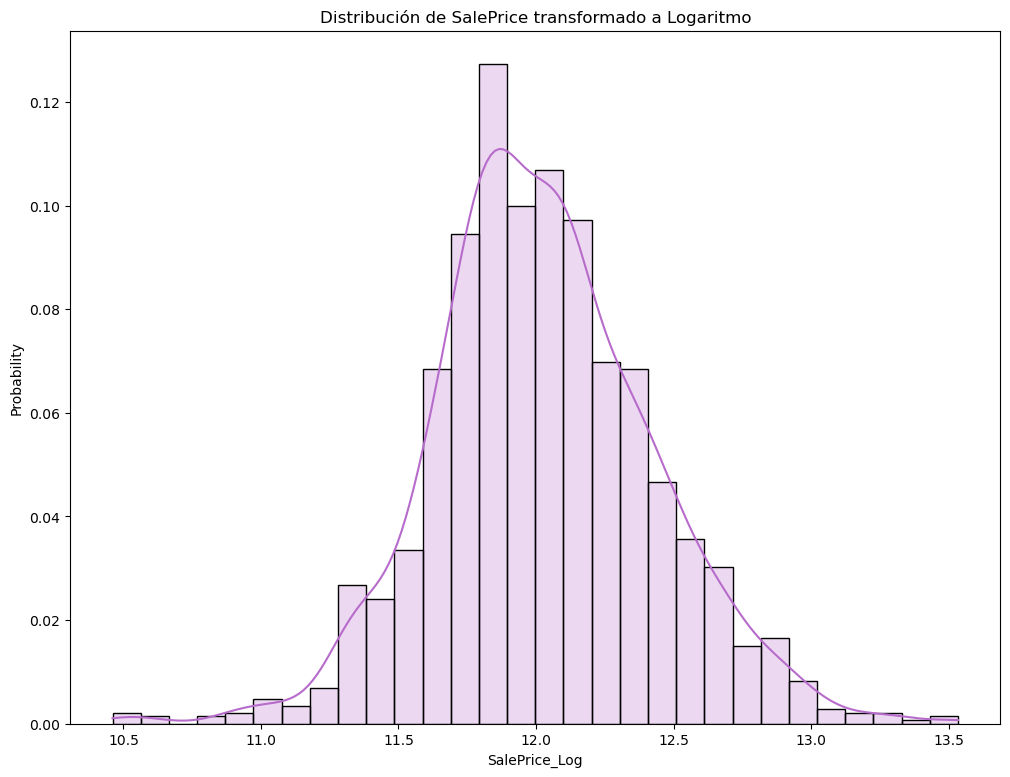

In [69]:
# Primero genero la variable logaritmica 
df['SalePrice_Log'] = np.log(df['SalePrice'])

# Luego grafico
plt.figure()
# Histograma
sns.histplot(data = df,
             x = 'SalePrice_Log',
             bins = 30,            
             alpha = 0.25,
             kde = True,
             stat='probability',
             color = '#B76BCB')
plt.title('Distribución de SalePrice transformado a Logaritmo')

## Conclusión: 
De esta manera, se puede apreciar una distribución más similar a una distribución "Normal", obteniendo una forma más simétrica de la variable. 

# Correlación 
Lo próximo que analizaremos es la correlación entre cada variable disponible, y la variable target. 
 <br> <br/>
 Algo a tener en cuenta es que este análisis, en principio, es válido únicamente para las variables numéricas. Dado que el dataset tiene muchas variables disponibles, haremos este análisis para detectar cuáles son las variables numéricas más relacionadas con la variable target, para detenernos en el análisis de algunas de ellas. 

In [70]:
# Calculo matriz de correlación 
matriz_correlacion = df.corr(method='pearson')
# Selecciono a la variable target para estudiar únicamente correlación con ella 
matriz_correlacion_target = matriz_correlacion['SalePrice_Log']
# Calculo valor absoluto, para extraer correlaciones más fuertes independientemente de su sentido 
matriz_correlacion_target = abs(matriz_correlacion_target)
# Menciono columnas que quiero excluir del análisis de correlación 
columnas_a_excluir = ['SalePrice', 'SalePrice_Log']
# Las excluyo del análisis
matriz_correlacion_target = matriz_correlacion_target.drop(columns=columnas_a_excluir, index=columnas_a_excluir)
# Ordeno de mayor a menor correlacion 
matriz_correlacion_target = matriz_correlacion_target.sort_values(ascending=False)

C:\Users\usernosis\AppData\Local\Temp\ipykernel_16072\1890438052.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion = df.corr(method='pearson')


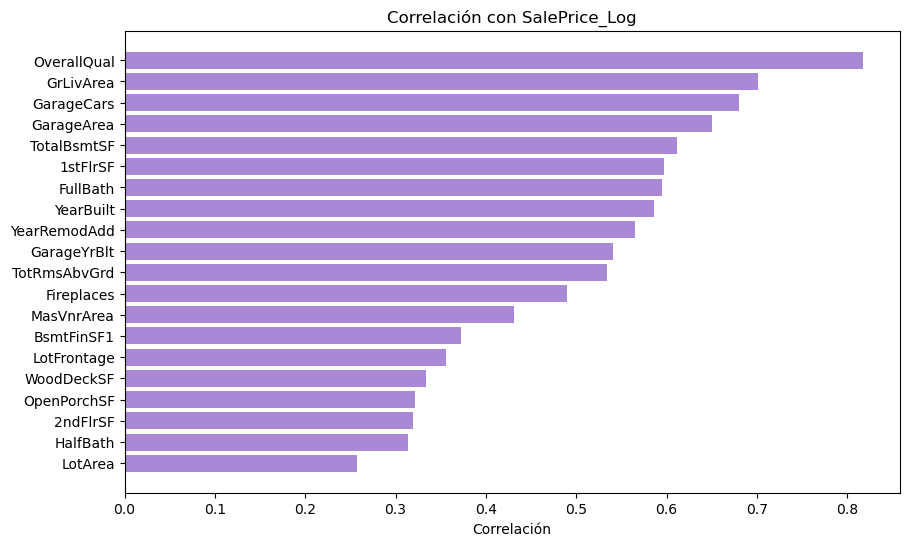

In [71]:
# Grafico el top 20 de variables más correlacionadas
matriz_correlacion_target_graficar = matriz_correlacion_target[0:20]
plt.figure(figsize=(10, 6))  # Tamaño de la figura
plt.barh(matriz_correlacion_target_graficar.index, 
         matriz_correlacion_target_graficar.values,
         color = '#A989D6')
plt.xlabel('Correlación')
plt.title('Correlación con SalePrice_Log')
plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar la característica más relevante en la parte superior
plt.show()

# OverallQual
Esta variable toma valores del 1 al 10, puntuando el estado de material y finalización de la casa. 10 es excelente, 1 es muy malo. 
 <br> <br/>
 Es una variable más bien categórica, y ordinal. 


## OverallQual: Análisis Univariado 
Lo que observamos en este caso es que la mayor parte de las casas fueron calificadas entre 4 y 8 puntos (94% de las observaciones). 

Text(0, 0.5, 'Cantidad de Viviendas')

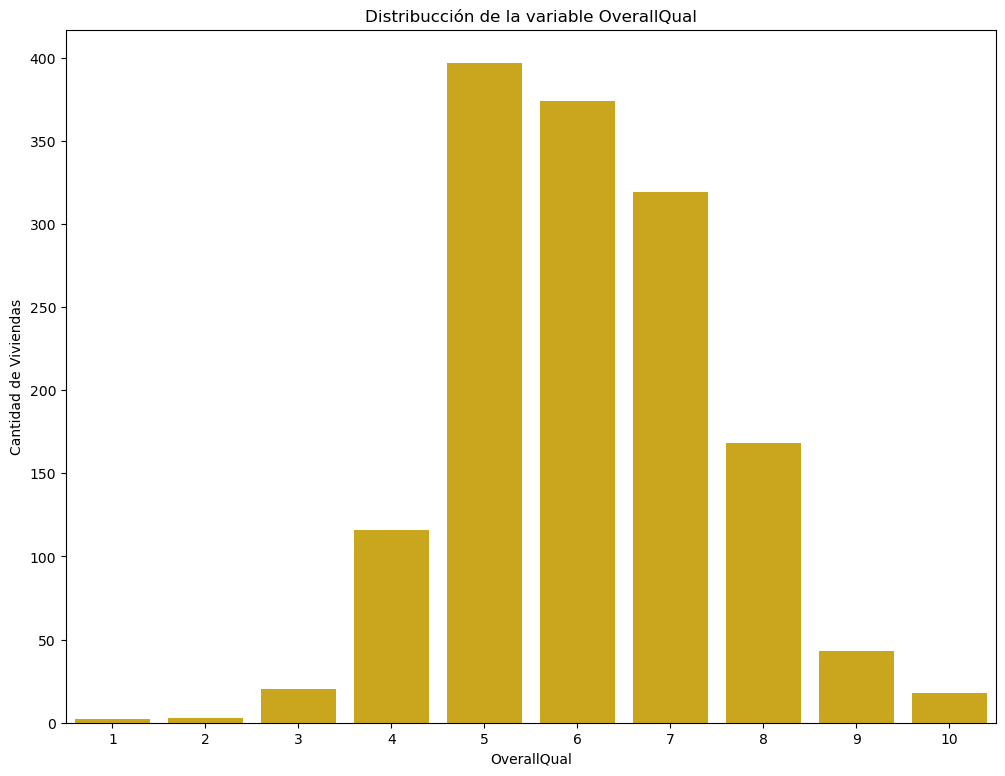

In [72]:
# Cantidad de casos por categoría 
plt.figure()
sns.countplot(data = df,
              x = 'OverallQual',
             color = '#E7B602')
plt.title('Distribucción de la variable OverallQual')
plt.ylabel('Cantidad de Viviendas')

In [73]:
conteo = df['OverallQual'].value_counts() 
conteo_maspresentes = conteo[[4,5,6,7,8]]
print('Porcentaje con OverallQual entre 4 y 8:')
print(str(round(conteo_maspresentes.sum()/conteo.sum(),4)*100) + '%')

Porcentaje con OverallQual entre 4 y 8:
94.11%


## OverallQual: Análisis Bivariado 
Lo próximo que haremos es ver cómo es la relación de esta variable con nuestro target. ¿Se visualiza la alta correlación que calculamos? Veamoslo en un gráfico. 

Text(0.5, 1.0, 'Relación entre Logaritmo del Precio de Venta y OverallQual')

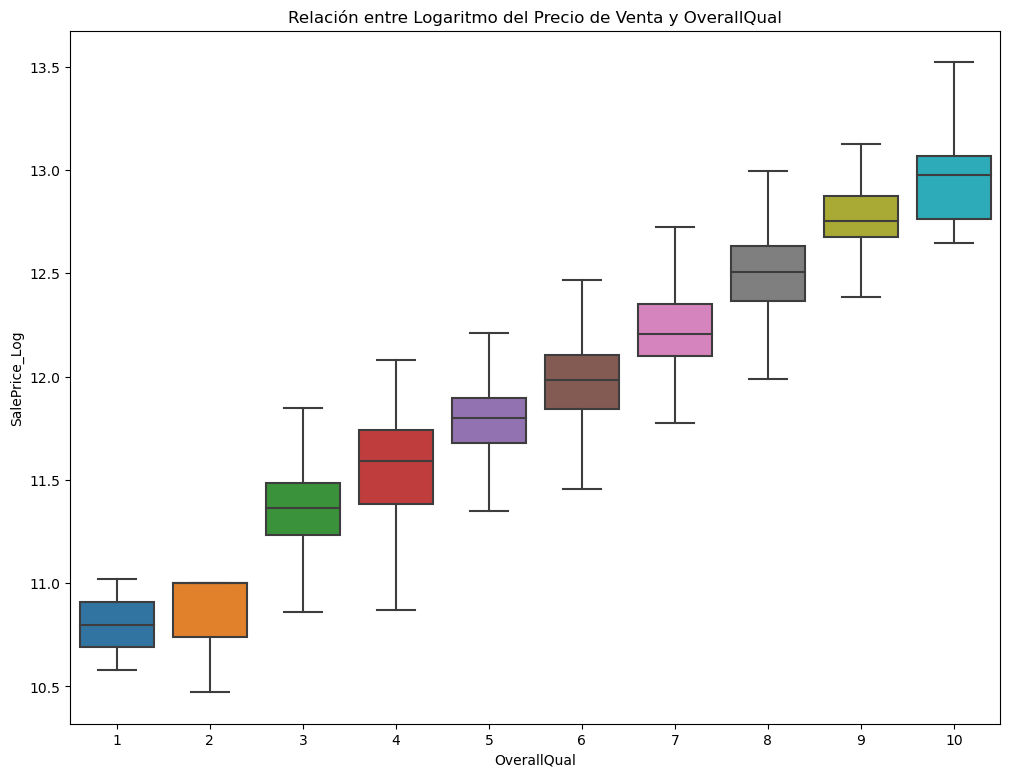

In [74]:
# Boxplot
plt.figure()
sns.boxplot(data = df,
            x = 'OverallQual',
            y = 'SalePrice_Log', 
            showfliers = False)
plt.title('Relación entre Logaritmo del Precio de Venta y OverallQual')

### Conclusión: 
Se puede apreciar que a medida que aumenta el puntaje asignado a la vivienda, el precio mediano y las cajas del boxplot también se incrementan, de manera monótona.
 <br> <br/>
 Esto significa que la variable podría funcionar como una buena predictora del precio de venta. En una siguiente etapa habrá que estudiar cuál es la mejor manera de incluirla en un algoritmo. Pero la relación es evidente y coherente. 

# GrLivArea
Esta variable mide el área habitable en la planta principal. 
 <br> <br/>
 Es una variable numérica. 


## GrLivArea: Análisis Univariado 
 Veamos su distribución y algunas estadísticas. 

In [12]:
df['GrLivArea'].describe().round()

count    1460.0
mean     1515.0
std       525.0
min       334.0
25%      1130.0
50%      1464.0
75%      1777.0
max      5642.0
Name: GrLivArea, dtype: float64

Text(0.5, 1.0, 'Distribución de GrLivArea')

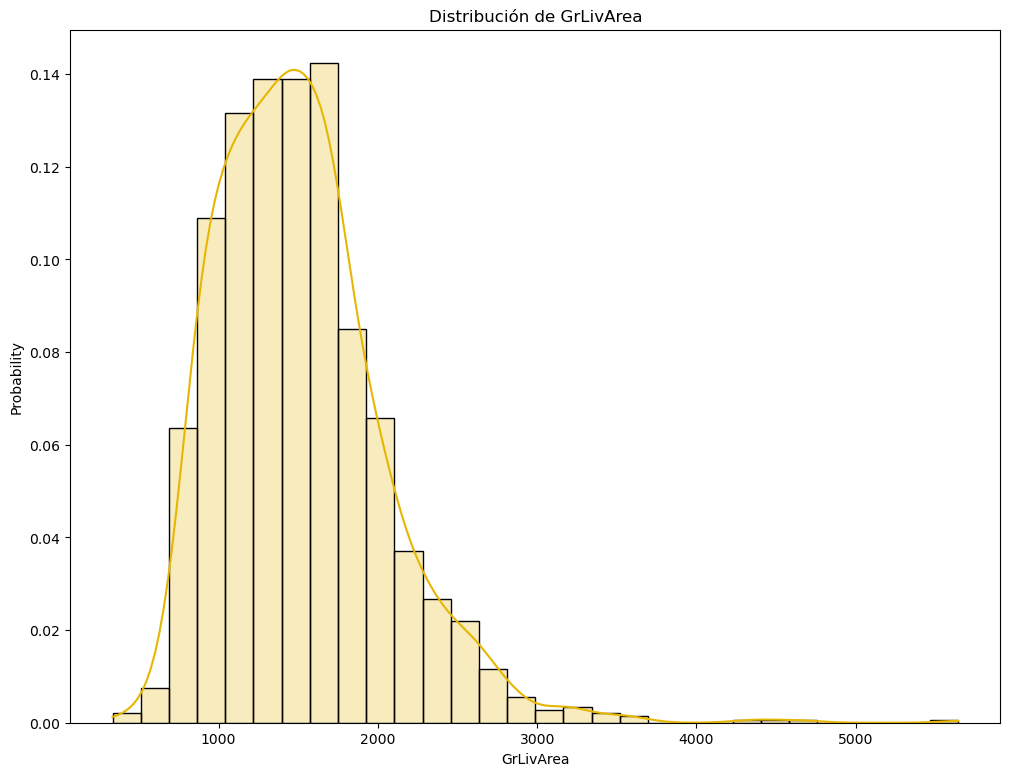

In [75]:
plt.figure()
# Histograma
sns.histplot(data = df,
             x = 'GrLivArea',
             bins = 30,            
             alpha = 0.25,
             kde = True,
             stat='probability',
             color = '#E7B602')
plt.title('Distribución de GrLivArea')

Al igual que la variable objetivo, podemos ver que este feature cuenta con una distribución asimétrica positiva. Probemos transformarla en logaritmo para centrar la distribución.

Text(0.5, 1.0, 'Distribución de GrLivArea transformada en logaritmo')

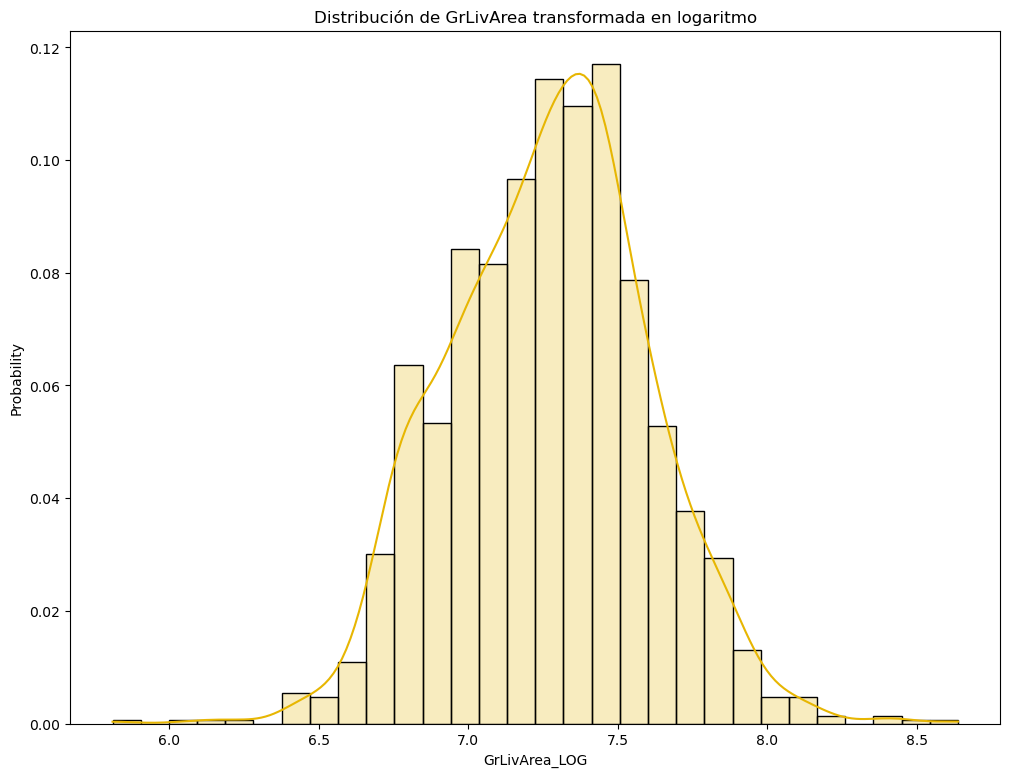

In [76]:
df['GrLivArea_LOG'] = np.log(df['GrLivArea'])
plt.figure()
# Histograma
sns.histplot(data = df,
             x = 'GrLivArea_LOG',
             bins = 30,            
             alpha = 0.25,
             kde = True,
             stat='probability',
             color = '#E7B602')
plt.title('Distribución de GrLivArea transformada en logaritmo')

## GrLivArea: Análisis Bivariado 
Lo próximo que haremos es ver cómo es la relación de esta variable con nuestro target. ¿Se visualiza la alta correlación que calculamos? Veamoslo en un gráfico. 

Text(0.5, 1.0, 'Relación entre Precio de Venta y Área Habitable')

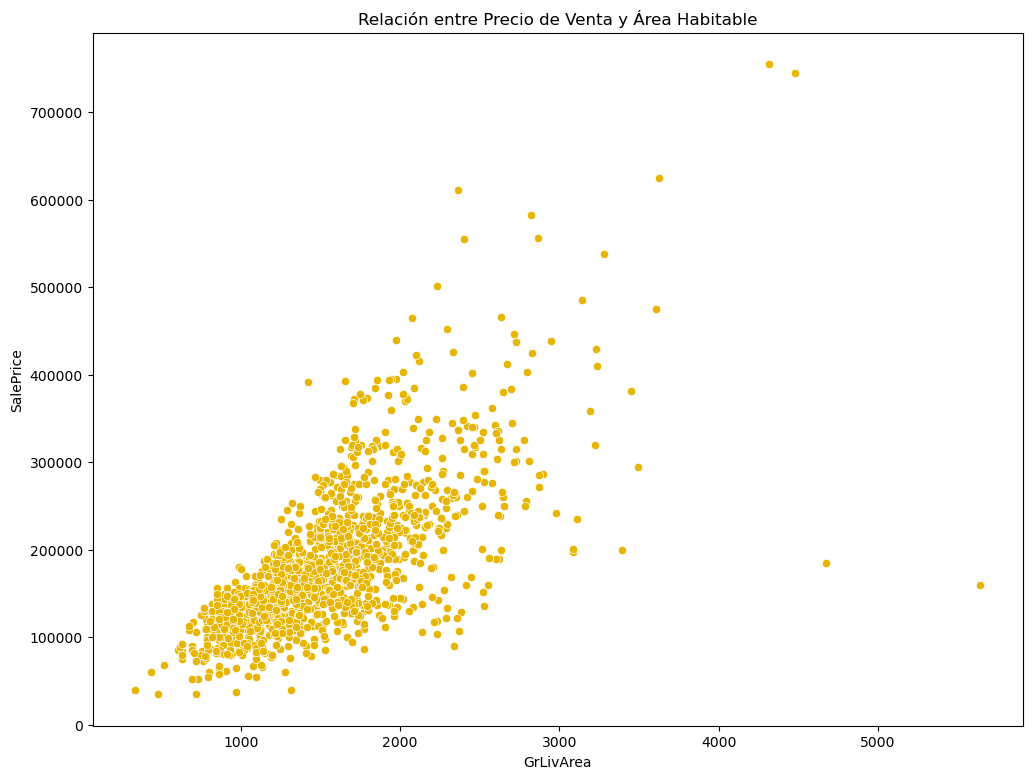

In [77]:
# Gráfico de puntos para evaluar relación
sns.scatterplot(data = df,
                x = 'GrLivArea',
                y = 'SalePrice',
                color = '#E7B602')
plt.title('Relación entre Precio de Venta y Área Habitable')

Text(0.5, 1.0, 'Relación entre Precio de Venta y Área Habitable (en logaritmo las dos)')

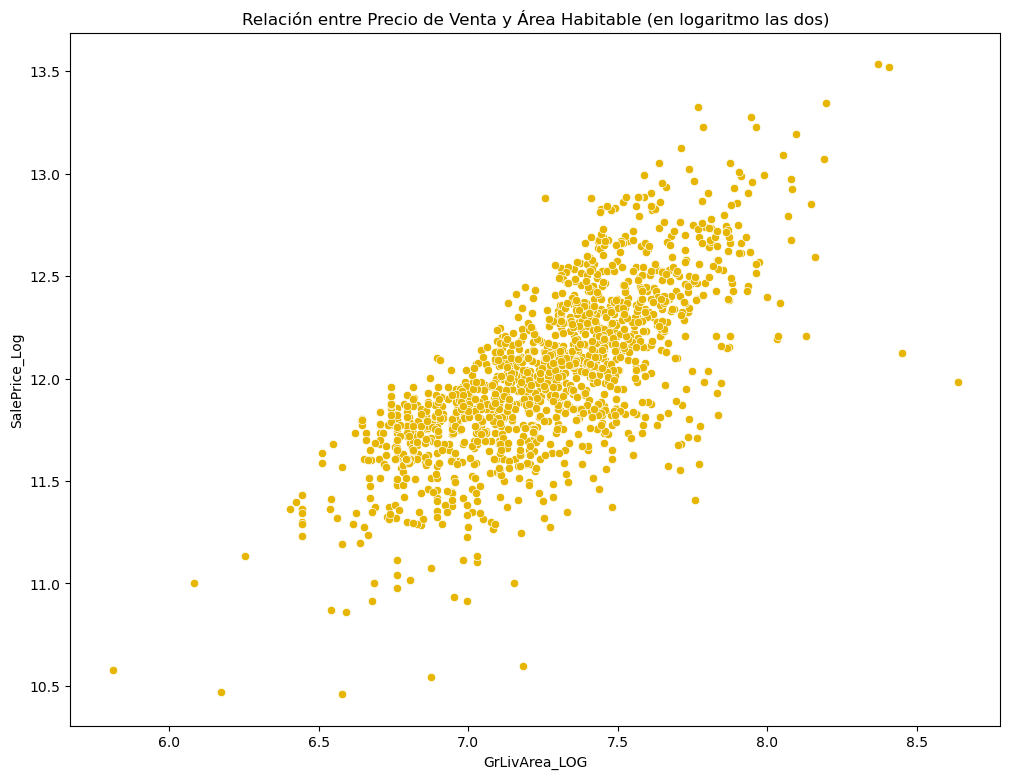

In [78]:
# Gráfico de puntos para evaluar relación
sns.scatterplot(data = df,
                x = 'GrLivArea_LOG',
                y = 'SalePrice_Log',
                color = '#E7B602')
plt.title('Relación entre Precio de Venta y Área Habitable (en logaritmo las dos)')

Efectivamente la relación se muestra muy fuerte. Es una variable importante a considerar, luego hay que definir cuál es la mejor estrategia para incorporarla a un algoritmo. 

In [79]:
matriz_correlacion_2 = df[['GrLivArea_LOG','GrLivArea','SalePrice_Log','SalePrice']].corr(method='pearson')
matriz_correlacion_2

,GrLivArea_LOG,GrLivArea,SalePrice_Log,SalePrice
GrLivArea_LOG,1.000000,0.966372,0.730255,0.695118
GrLivArea,0.966372,1.000000,0.700927,0.708624
SalePrice_Log,0.730255,0.700927,1.000000,0.948374
SalePrice,0.695118,0.708624,0.948374,1.000000


# Relación entre las dos variables más correlacionadas con el target
Estas dos variables de manera separada parecieran guardar una fuerte relación con la variable objetivo: el precio de venta de una casa. 
 <br> <br/>
 Ahora bien, algo que también podría ser interesante estudiar es qué relación guardan entre ellas? 
  <br> <br/>
  Veamos gráficamente: 
  

Text(0.5, 1.0, 'Relación entre Logaritmo del GrLivArea_LOG y OverallQual')

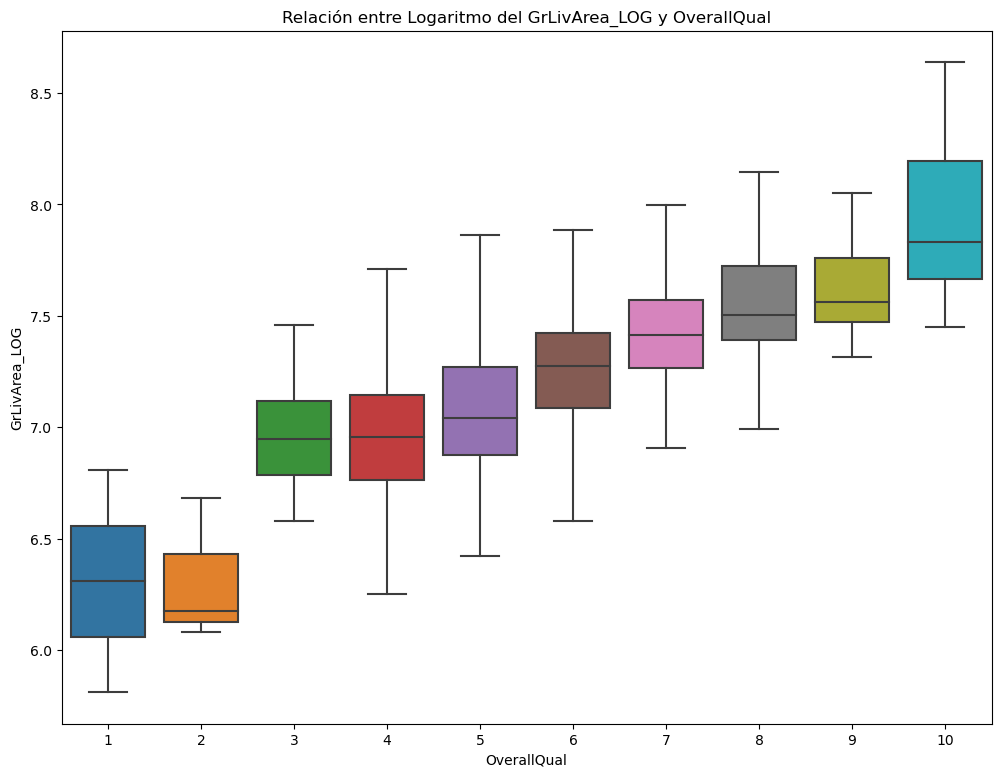

In [80]:
# Boxplot
plt.figure()
sns.boxplot(data = df,
            x = 'OverallQual',
            y = 'GrLivArea_LOG', 
            showfliers = False)
plt.title('Relación entre Logaritmo del GrLivArea_LOG y OverallQual')

Visualmente parecieran mantener una especie de relación, ya que a mayor puntaje pareciera verse mayor área habitable. Calculemos el coeficiente de correlación: 


In [81]:
coeficiente = df[['OverallQual','GrLivArea_LOG']].corr(method='pearson')
coeficiente

,OverallQual,GrLivArea_LOG
OverallQual,1.00000,0.61421
GrLivArea_LOG,0.61421,1.00000


El coeficiente de correlación es positivo (como era esperable, ya que aparentemente la relación es positivo), y es superior a 0.5 lo que indicaría una fuerte relación. 
 <br> <br/>
 Construyamos una variable más acotada sobre la calificación de la casa y evaluemos la relación de las 3 variables en conjunto: precio de venta, área habitable y puntaje de la vivienda. 

# Generación de nuevas variables
Parte importante del trabajo del científico de datos es buscar la mejor manera de sacarle provecho a cada dato disponible. En este caso, trabajaremos en la generación de features a partir de ciertos datos que quizás, analizados de manera aislada, parecieran no tener mucho sentido. 


## Variables con factor tiempo 
Generalmente, las variables que tienen asociada algún tipo de fecha no aportan demasiado valor agregado por si misma. Lo que realmente genera una diferencia es lo que construimos a partir de ellas. 
<br> <br/>
En este caso, tenemos disponible la siguiente información respecto al tiempo: 
* YrSold: Año de venta 
* YearBuilt: Fecha de origen de la construcción de la vivienda 
* YearRemodAdd: Fecha en que se remodeló la vivienda 
* GarageYrBlt: Año en que se construyó el garage 

In [82]:
df['YrSold'].value_counts()

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

Text(0.5, 1.0, 'Relación entre Precio de Venta y Año de construcción de la vivienda')

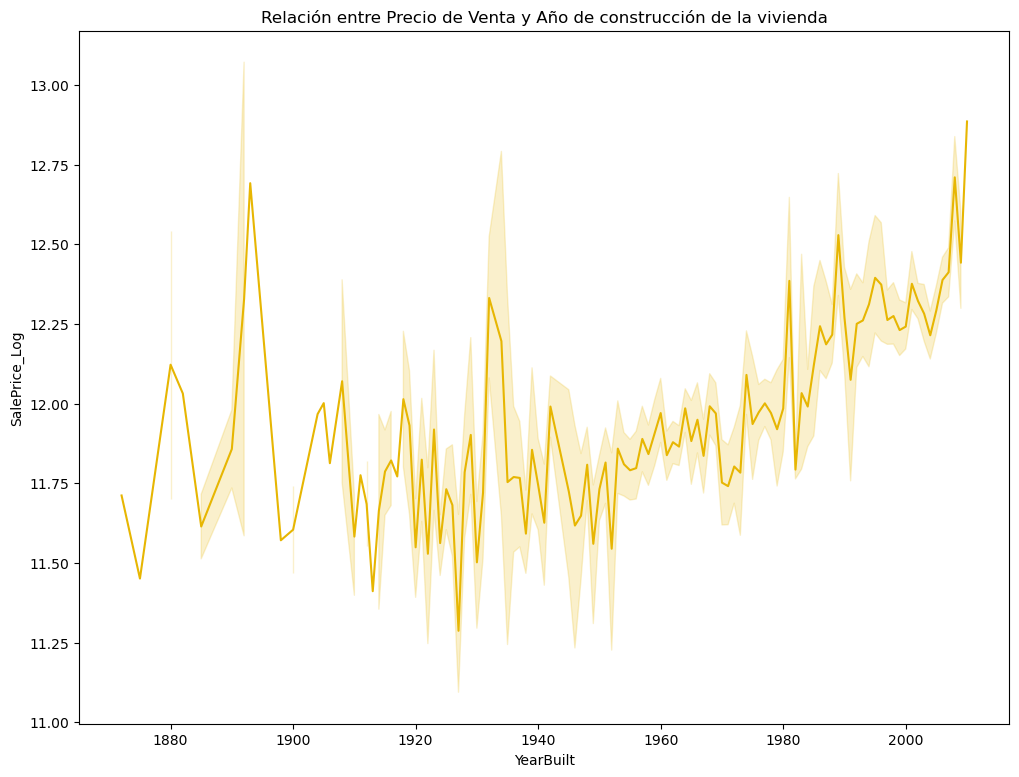

In [83]:
plt.figure()
sns.lineplot(data = df,
                x = 'YearBuilt',
                y = 'SalePrice_Log',
                color = '#E7B602')
plt.title('Relación entre Precio de Venta y Año de construcción de la vivienda')

## 1) Antig_Viv: Antiguedad de la vivienda 
Generaremos una variable que cuente la cantidad de años transcurridos entre la fecha de construcción de la vivienda y el momento de la venta. Luego, analizaremos si efectivamente la antiguedad de la vivienda tiene alguna influencia en el precio de venta. 

In [84]:
# Construcción de la variable (Antig_Viv): 
df['Antig_Viv'] = df['YrSold'] - df['YearBuilt']
df['Antig_Viv'].describe()

count    1460.000000
mean       36.547945
std        30.250152
min         0.000000
25%         8.000000
50%        35.000000
75%        54.000000
max       136.000000
Name: Antig_Viv, dtype: float64

Text(0.5, 1.0, 'Distribución de Antiguedad de la Vivienda')

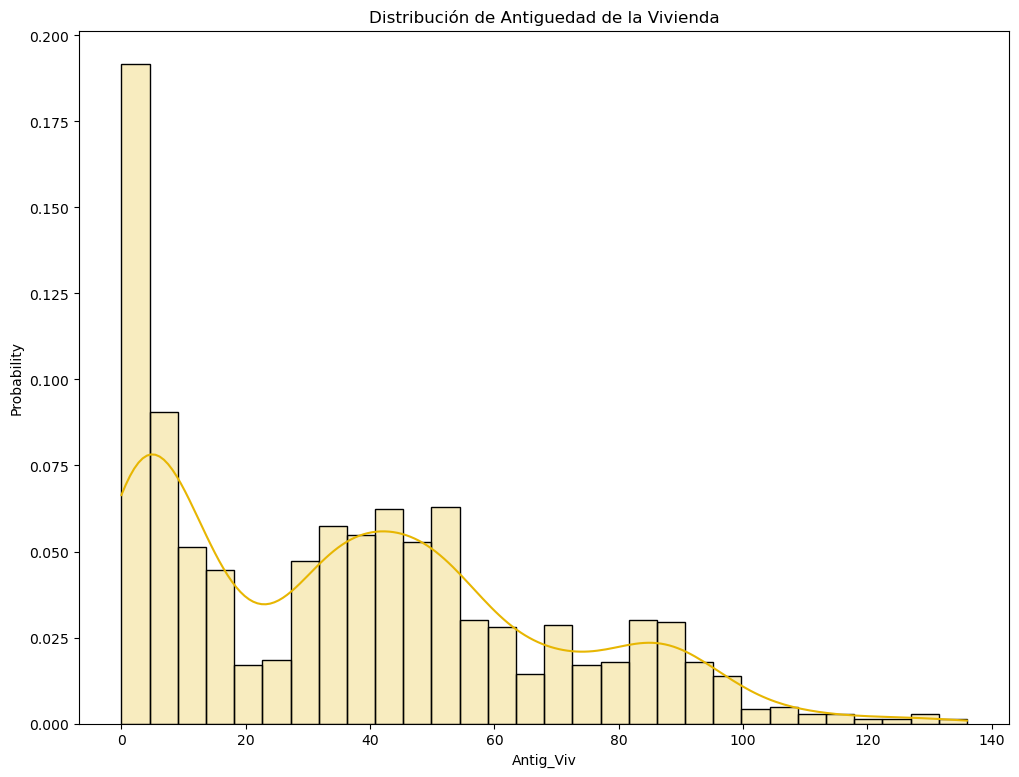

In [85]:
# Histograma
plt.figure()
sns.histplot(data = df,
             x = 'Antig_Viv',
             bins = 30,            
             alpha = 0.25,
             kde = True,
             stat='probability',
             color = '#E7B602')
plt.title('Distribución de Antiguedad de la Vivienda')

### Algunas primeras conclusiones: 
* Hay muchas casas nuevas
* Hay muy pocas casas con más de 100 años 
* La mitad de las casas tienen menos de 35 años de antiguedad

## Antig_Viv: Análisis Bivariado 
Veamos cómo se relaciona la antiguedad de la vivienda con la variable target. 

Text(0.5, 1.0, 'Relación entre Precio de Venta y Antiguedad de la Vivienda al momento de la venta')

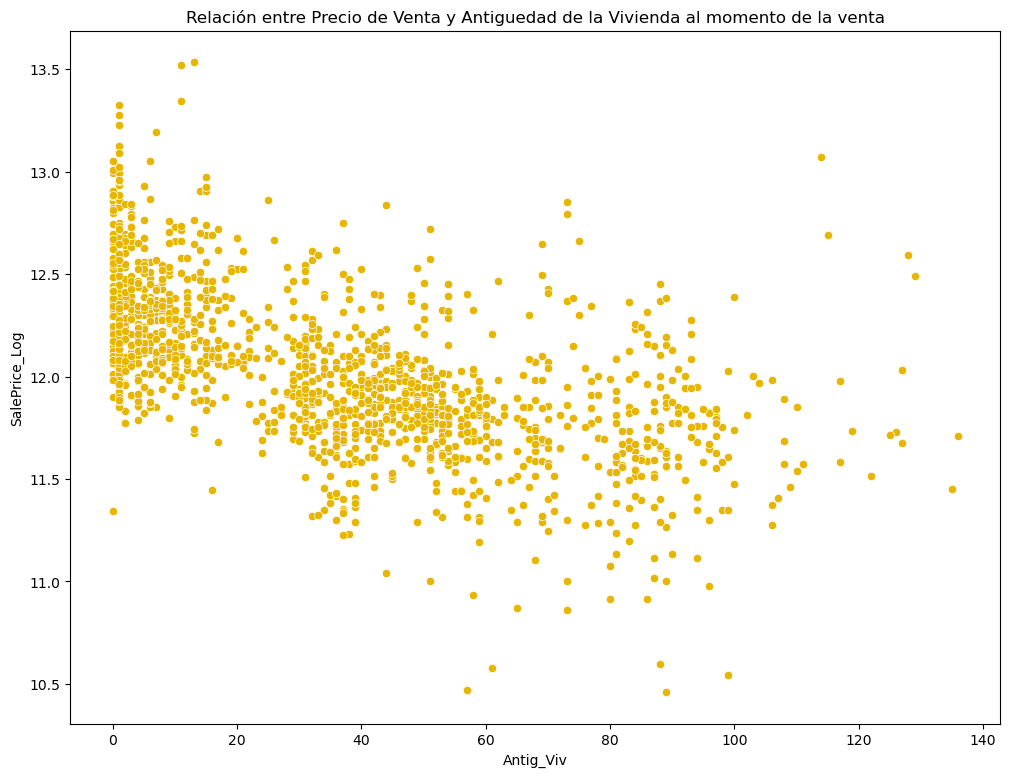

In [86]:
# Gráfico de puntos para evaluar relación
sns.scatterplot(data = df,
                x = 'Antig_Viv',
                y = 'SalePrice_Log',
                color = '#E7B602')
plt.title('Relación entre Precio de Venta y Antiguedad de la Vivienda al momento de la venta')

In [87]:
# Y la correlación ? 
coeficiente = df[['Antig_Viv','SalePrice_Log']].corr(method='pearson')
coeficiente

,Antig_Viv,SalePrice_Log
Antig_Viv,1.00000,-0.58729
SalePrice_Log,-0.58729,1.00000


Text(0.5, 1.0, 'Relación entre Precio de Venta y Antiguedad de la vivienda')

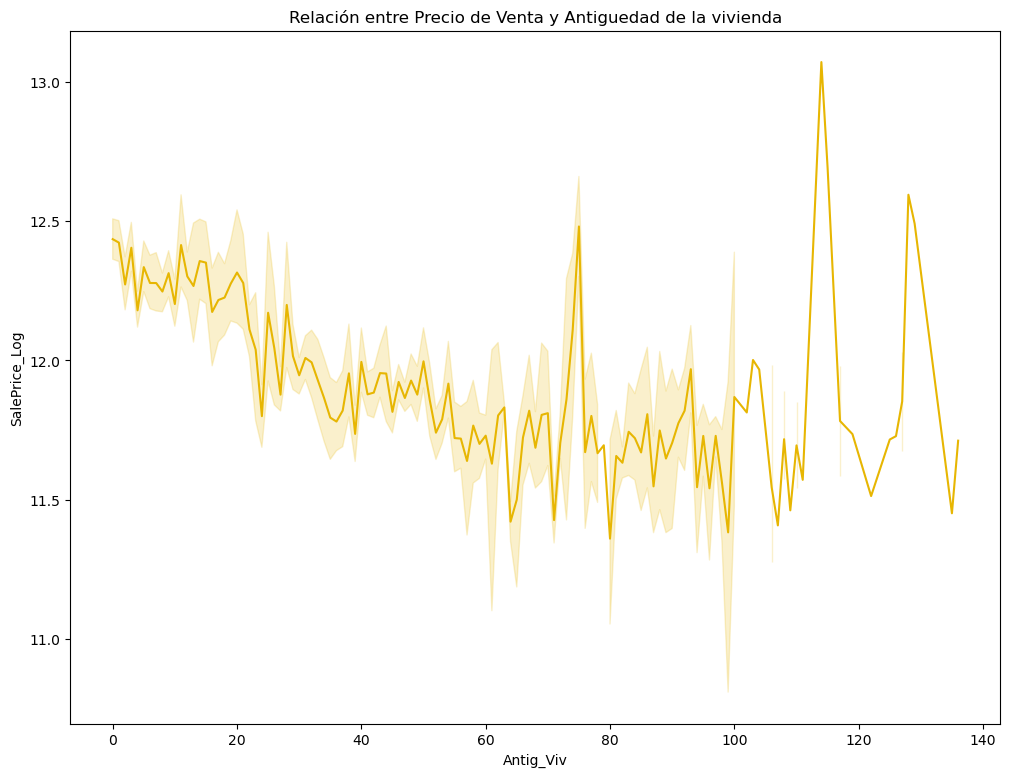

In [88]:
plt.figure()
sns.lineplot(data = df,
                x = 'Antig_Viv',
                y = 'SalePrice_Log',
                color = '#E7B602')
plt.title('Relación entre Precio de Venta y Antiguedad de la vivienda')

### Conclusiones: 
* Se ven relaciones claras entre la antiguedad de la vivienda y su precio. Aparentemente las casas nuevas tienne un precio de venta más elevado.  
* El coeficiente de correlación es bastante alto en valores absolutos, y es negativo (a mayor antiguedad, menor es el precio)

## 2) Antig_Rem: Tiempo desde la última remodelación
Generaremos una variable que cuente la cantidad de años transcurridos entre la última remodelación de la vivienda y el momento de la venta. Luego, analizaremos si efectivamente la antiguedad de la vivienda tiene alguna influencia en el precio de venta.

In [89]:
# Construcción de la variable corregida (Antig_Rem): 
df['Antig_Rem'] = np.where( df['YearRemodAdd'] > df['YrSold'],
                            df['YrSold'] - df['YearBuilt'],
                            df['YrSold'] - df['YearRemodAdd'])
df['Antig_Rem'].describe()

count    1460.000000
mean       22.950685
std        20.639875
min         0.000000
25%         4.000000
50%        14.000000
75%        41.000000
max        60.000000
Name: Antig_Rem, dtype: float64

Text(0.5, 1.0, 'Relación entre Antiguedad de la Vivienda y tiempo desde última remodelación')

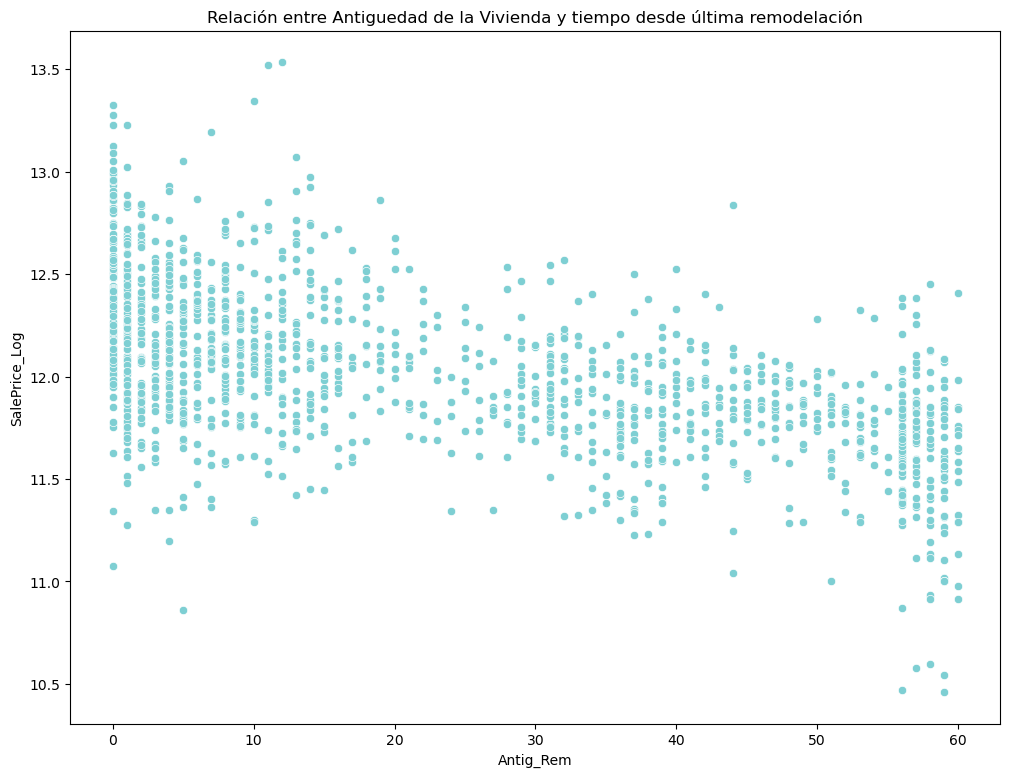

In [90]:
# Gráfico de puntos para evaluar relación
sns.scatterplot(data = df,
                x = 'Antig_Rem',
                y = 'SalePrice_Log',
                color = '#7ECFD3')
plt.title('Relación entre Antiguedad de la Vivienda y tiempo desde última remodelación')

In [91]:
# Y la correlación ? 
coeficiente = df[['Antig_Rem','SalePrice_Log']].corr(method='pearson')
coeficiente

,Antig_Rem,SalePrice_Log
Antig_Rem,1.000000,-0.568149
SalePrice_Log,-0.568149,1.000000


Text(0.5, 1.0, 'Relación entre Antiguedad de la Vivienda y tiempo desde última remodelación')

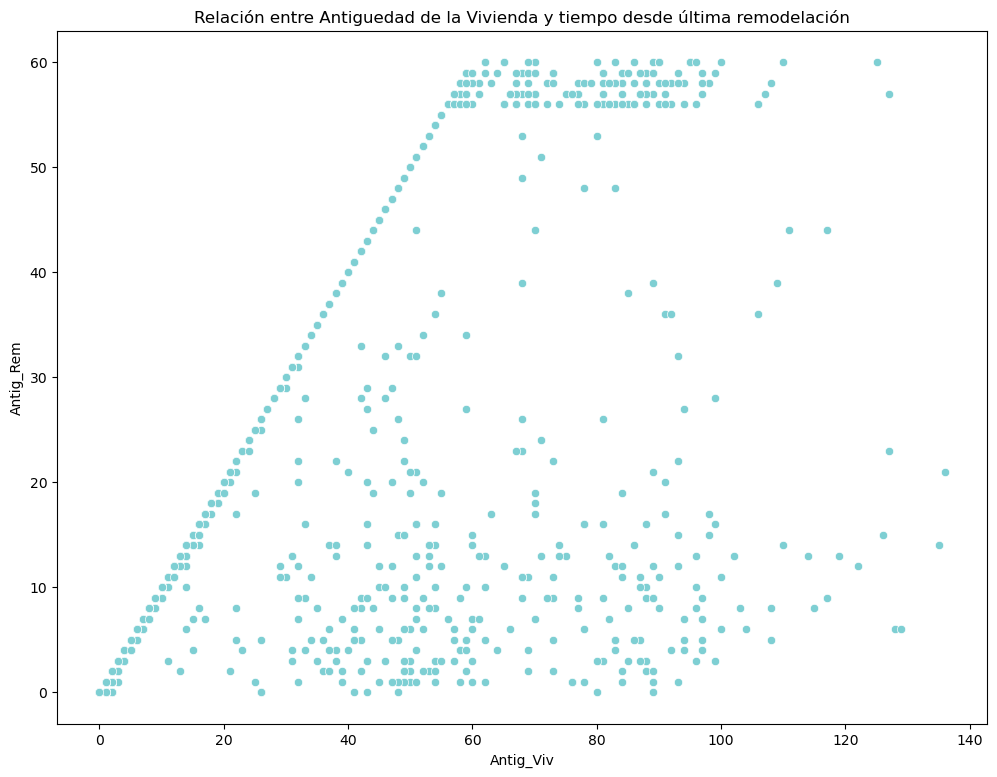

In [92]:
# Gráfico de puntos para evaluar relación
sns.scatterplot(data = df,
                x = 'Antig_Viv',
                y = 'Antig_Rem',
                color = '#7ECFD3')
plt.title('Relación entre Antiguedad de la Vivienda y tiempo desde última remodelación')

Text(0.5, 1.0, 'Relación entre Antiguedad de la Vivienda y tiempo desde última remodelación')

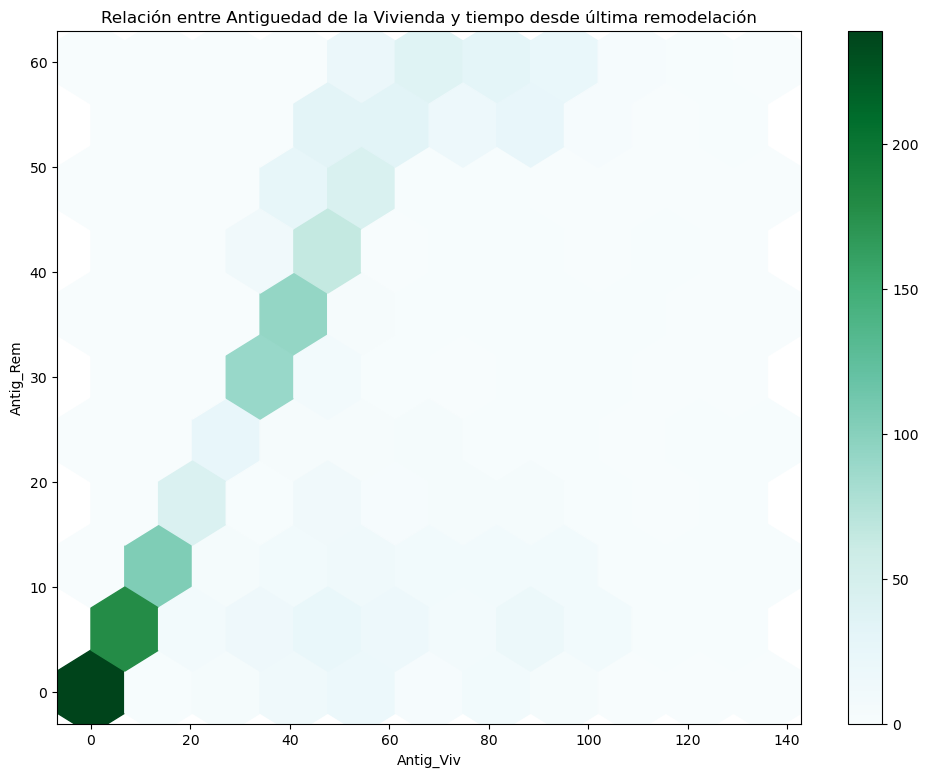

In [96]:
# Gráfico Hexbin
df.plot.hexbin(x ='Antig_Viv', y = 'Antig_Rem', 
               gridsize = 10)
plt.title('Relación entre Antiguedad de la Vivienda y tiempo desde última remodelación')

Text(0.5, 1.0, 'Relación entre Precio de Venta y Antiguedad de la vivienda')

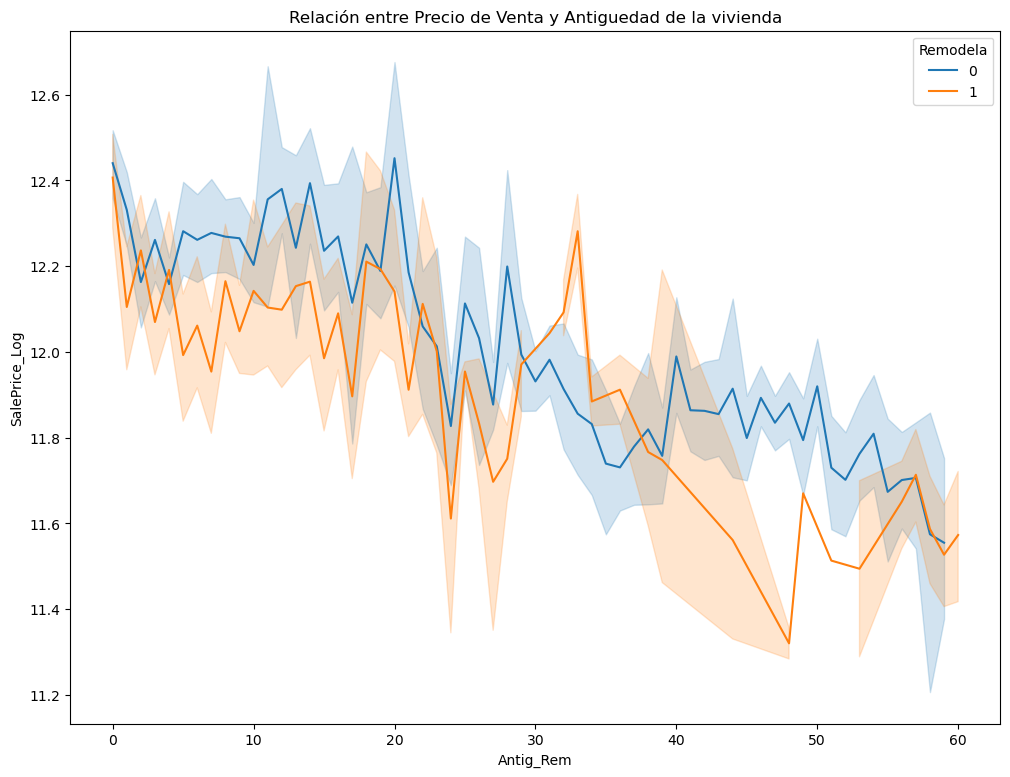

In [98]:
df['Remodela'] = np.where(df['YearRemodAdd'] > df['YearBuilt'],1,0)
plt.figure()
sns.lineplot(data = df,
             x = 'Antig_Rem',
             y = 'SalePrice_Log',
             hue = 'Remodela')
plt.title('Relación entre Precio de Venta y Antiguedad de la vivienda')

<Axes: xlabel='Antig_Rem', ylabel='SalePrice_Log'>

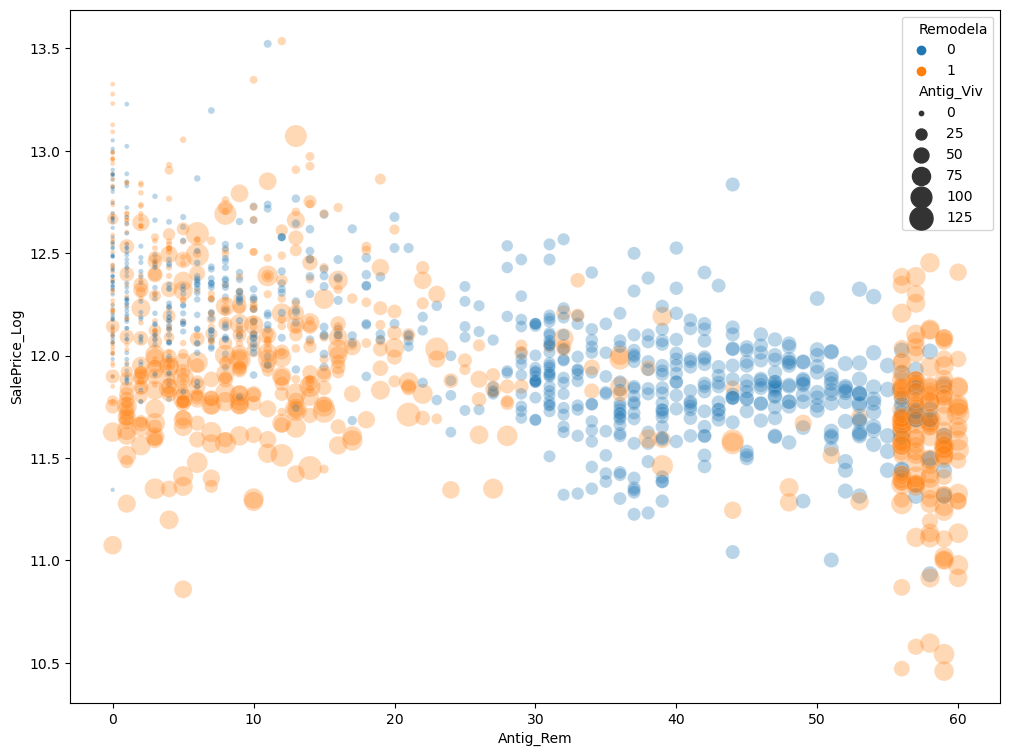

In [51]:
# Gráfico de burbujas
sns.scatterplot(data = df,
                x = 'Antig_Rem',
                y = 'SalePrice_Log',
                hue = 'Remodela',
                size = 'Antig_Viv', 
                sizes = (10, 300),
                alpha = 0.3) 

<Axes: xlabel='Antig_Rem', ylabel='Antig_Viv'>

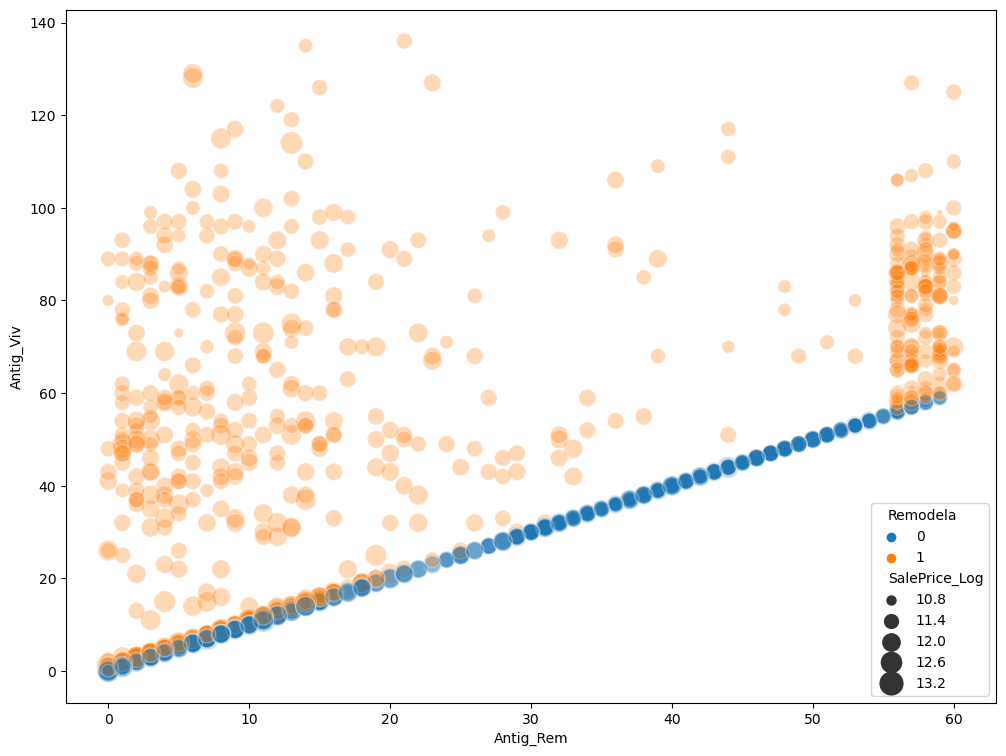

In [99]:
# Gráfico de burbujas
sns.scatterplot(data = df,
                x = 'Antig_Rem',
                y = 'Antig_Viv',
                hue = 'Remodela',
                size = 'SalePrice_Log', 
                sizes = (10, 300),
                alpha = 0.3) 

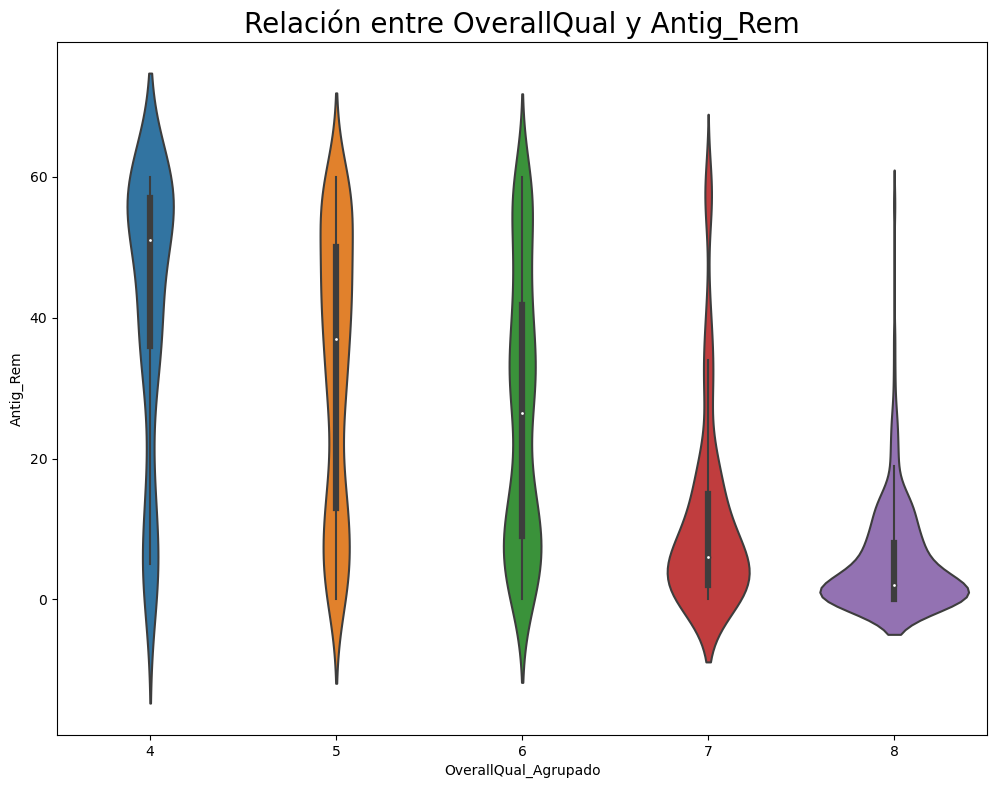

In [100]:
# Violin plot
df['OverallQual_Agrupado'] = np.where(df['OverallQual'] < 4,
                                     4,
                                     np.where(df['OverallQual']>8,
                                             8,
                                             df['OverallQual']))
sns.violinplot(data = df,
               x = 'OverallQual_Agrupado', 
               y = 'Antig_Rem')
plt.title('Relación entre OverallQual y Antig_Rem', fontsize = 20, fontweight = 30)
plt.show()

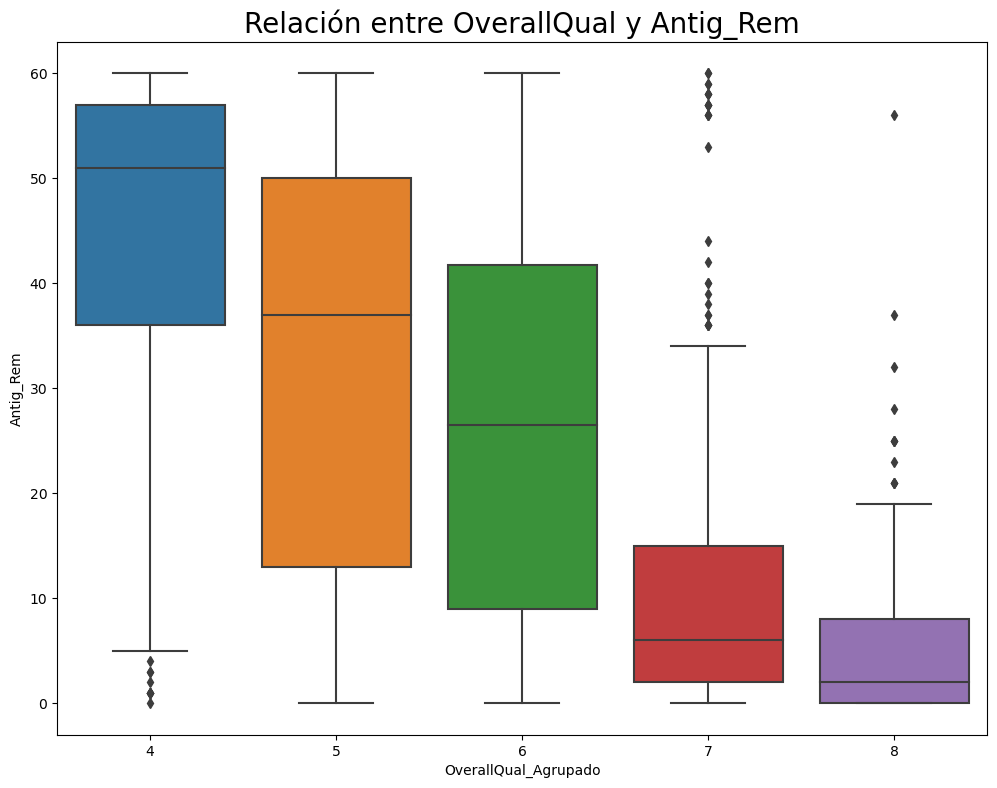

In [101]:
sns.boxplot(data = df,
               x = 'OverallQual_Agrupado', 
               y = 'Antig_Rem')
plt.title('Relación entre OverallQual y Antig_Rem', fontsize = 20, fontweight = 30)
plt.show()